# A/B Testing - Lab

## Introduction

In this lab, you'll go through the process of designing an experiment.

## Objectives
You will be able to:

* Design, structure, and run an A/B test


## The Scenario

You've been tasked with designing an experiment to test whether a new email template will be more effective for your company's marketing team. The current template has a 5% response rate (with standard deviation .0475), which has outperformed numerous other templates in the past. The company is excited to test the new design that was developed internally but nervous about losing sales if it is not to work out. As a result, they are looking to determine how many individuals they will need to serve the new email template in order to detect a 1% performance increase.


## Step 1: State the Null Hypothesis, $H_0$

State your null hypothesis here (be sure to make it quantitative as before)

In [ ]:
# H_0 = Your null hypothesis
# H_0: There is no difference between the current template and the new template.
# H_0: mu = x_bar = 0.5

## Step 2: State the Alternative Hypothesis, $H_1$

State your alternative hypothesis here (be sure to make it quantitative as before)

In [ ]:
# H_1 = Your alternative hypothesis
# H_1 = The new email template increases response rate by 1% or more.
# x_bar >= 0.06 (mu + 0.01)

## Step 3: Calculate n for standard alpha and power thresholds

Now define what $\alpha$ and $\beta$ you believe might be appropriate for this scenario.
To start, arbitrarily set $\alpha$ to 0.05. From this, calculate the required sample size to detect a .01 response rate difference at a power of .8.

> Note: Be sure to calculate a normalized effect size using Cohen's d from the raw response rate difference.

In [35]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.power import TTestPower
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
# Calculate the required sample size
alpha = 0.05
power = 0.8
pop_std = 0.0475
effect_size =  0.01 / pop_std

nobs = TTestPower().solve_power(alpha = alpha, power = power, effect_size = effect_size)
nobs

179.02014137759403

## Step 4: Plot Power Curves for Alternative Experiment Formulations

While you now know how many observations you need in order to run a t-test for the given formulation above, it is worth exploring what sample sizes would be required for alternative test formulations. For example, how much does the required sample size increase if you put the more stringent criteria of $\alpha=.01$? Or what is the sample size required to detect a .03 response rate difference at the same $\alpha$ and power thresholds? To investigate this, plot power vs sample size curves for alpha values of .01, .05 and .1 along with varying response rate differences of .005, .01, .02 and .03.

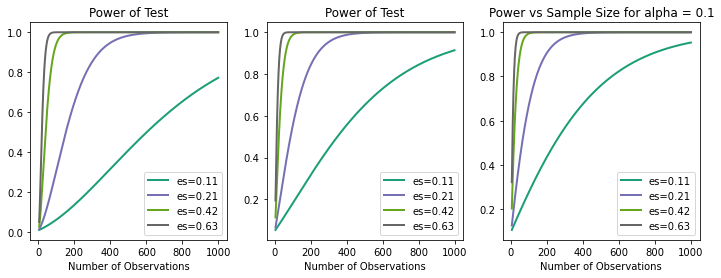

In [54]:
alphas = np.array([.01, .05, .1])
response_rates = [.005, .01, .02, .03]
effect_sizes = np.array(response_rates) / pop_std

f, axs = plt.subplots(1, 3, figsize=(12,4))
for n, alpha in enumerate(alphas):
    TTestPower().plot_power(dep_var='nobs',
                            nobs = np.array(range(5,1000)),
                            effect_size = effect_sizes,
                            alpha=alpha,
                            ax = axs[n])
    
    plt.title(f'Power vs Sample Size for alpha = {alpha}')
    #plt.show()

## Step 5: Propose a Final Experimental Design

Finally, now that you've explored some of the various sample sizes required for statistical tests of varying power, effect size and type I errors, propose an experimental design to pitch to your boss and some of the accompanying advantages or disadvantages with it.

### Your answer here

In [58]:
# Calculate the required sample size
alpha = 0.05
power = 0.90
pop_std = 0.0475
effect_size =  0.01 / pop_std

nobs = TTestPower().solve_power(alpha = alpha, power = power, effect_size = effect_size)
nobs

239.00265924713455

Type I is rejecting H_0 when it is false.
Type II is failing to reject H_1 when it is true.

Alpha tells us P(False Positive) = .05
Power tells us P(False Negative) = .10

To test for a 1% change the email response rate we would have .95 confidence of correctly identifyin a better email template if it is better, and a .10 probability of of incorrectly identifying the a template that is not better as better.  This test would require sending 240 emails with the new template.

We can adjust the test design as necessary to account for greater accuracy and sample size or lower accuracy and lower sample size.


## Summary

In this lab, you practiced designing an initial experiment and then refined the parameters of the experiment based on an initial sample to determine feasibility.